In [391]:
import pandas as pd
import numpy as np
import math

In [16]:
files = ['^W5000.csv', 'AMZN.csv', 'GOOG.csv', 'META.csv', 'MSFT.csv']

df = pd.read_csv('AMZN.csv')
df.set_index('Date')['Close']

Date
2017-07-10     49.823502
2017-07-11     49.706501
2017-07-12     50.325500
2017-07-13     50.031502
2017-07-14     50.090500
                 ...    
2022-07-01    109.559998
2022-07-05    113.500000
2022-07-06    114.330002
2022-07-07    116.330002
2022-07-08    115.540001
Name: Close, Length: 1259, dtype: float64

In [53]:
x = np.log(1.0 + df['Close'].pct_change(1).dropna().to_numpy())

In [183]:
np.random.choice(x, (10, 1), replace=True)

array([[ 0.0034663 ],
       [-0.00470085],
       [-0.02070991],
       [ 0.03948659],
       [ 0.00305089],
       [ 0.01134029],
       [ 0.01435236],
       [ 0.00080367],
       [ 0.00495535],
       [ 0.00957619]])

In [184]:
import arch

# a standard GARCH(1,1) model
garch = arch.arch_model(100*x, vol='garch', p=1, o=0, q=1)
garch_fitted = garch.fit()

# one-step out-of sample forecast
garch_forecast = garch_fitted.forecast(horizon=1)
predicted_et = garch_forecast.mean['h.1'].iloc[-1]

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7119.59139104029
Iteration:      2,   Func. Count:     14,   Neg. LLF: 114356.2756974654
Iteration:      3,   Func. Count:     22,   Neg. LLF: 2682.534980211362
Iteration:      4,   Func. Count:     28,   Neg. LLF: 2599.5390508880314
Iteration:      5,   Func. Count:     34,   Neg. LLF: 2770.9954029085447
Iteration:      6,   Func. Count:     40,   Neg. LLF: 2591.59797122614
Iteration:      7,   Func. Count:     45,   Neg. LLF: 2591.7579762043824
Iteration:      8,   Func. Count:     51,   Neg. LLF: 2591.597642164129
Iteration:      9,   Func. Count:     57,   Neg. LLF: 2591.5597880691735
Iteration:     10,   Func. Count:     62,   Neg. LLF: 2591.5597786257126
Iteration:     11,   Func. Count:     66,   Neg. LLF: 2591.5597786257076
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2591.5597786257126
            Iterations: 11
            Function evaluations: 66
            Gradient evaluation

In [185]:
garch_fitted

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                      GARCH   Log-Likelihood:               -2591.56
Distribution:                  Normal   AIC:                           5191.12
Method:            Maximum Likelihood   BIC:                           5211.67
                                        No. Observations:                 1258
Date:                Mon, Jul 11 2022   Df Residuals:                     1254
Time:                        20:45:44   Df Model:                            4
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1646  5.253e-02      3.133  1.730e-03 [6.162e-0

In [181]:
np.var(garch.simulate(garch_fitted.params, 2000)['data'].to_numpy())

5.16895951176819

In [133]:
garch_fitted.params

mu          0.164575
omega       0.323144
alpha[1]    0.176557
beta[1]     0.759228
Name: params, dtype: float64

In [159]:
np.var(x*100)

4.473571913441831

In [197]:
import numpy as np
from arch.univariate import ARX
arx = ARX(100*x, lags=[1, 2])
res = arx.fit()

In [192]:
res

                     AR - Constant Variance Model Results                     
Dep. Variable:                      y   R-squared:                       0.003
Mean Model:                        AR   Adj. R-squared:                 -0.001
Vol Model:          Constant Variance   Log-Likelihood:               -2716.69
Distribution:                  Normal   AIC:                           5447.39
Method:            Maximum Likelihood   BIC:                           5483.32
                                        No. Observations:                 1253
Date:                Mon, Jul 11 2022   Df Residuals:                     1246
Time:                        20:49:33   Df Model:                            7
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const          0.0677  6.129e-02      1.104      0.270 

In [198]:
from arch.univariate import GARCH
arx.volatility=GARCH()
res = arx.fit(update_freq=0, disp='off')

In [199]:
res

                           AR - GARCH Model Results                           
Dep. Variable:                      y   R-squared:                      -0.005
Mean Model:                        AR   Adj. R-squared:                 -0.006
Vol Model:                      GARCH   Log-Likelihood:               -2588.51
Distribution:                  Normal   AIC:                           5189.03
Method:            Maximum Likelihood   BIC:                           5219.84
                                        No. Observations:                 1256
Date:                Mon, Jul 11 2022   Df Residuals:                     1250
Time:                        20:50:49   Df Model:                            6
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const          0.1643  5.459e-02      3.010  2.612e-03 

In [244]:
sim = arx.simulate(res.params, 1000, initial_value_vol = 0.02) / 100

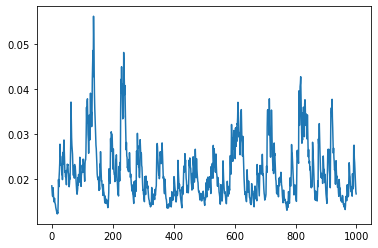

In [245]:
plt.plot(sim['volatility'])

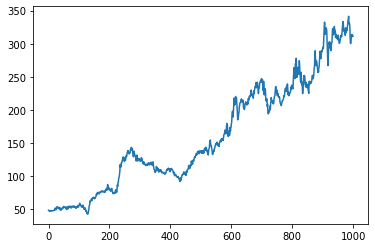

In [248]:
plt.plot(49 * np.exp(np.cumsum(sim['data'])))

In [249]:
import pandas as pd
import numpy as np

df = pd.read_csv('AMZN.csv')
df.set_index('Date')['Close']

Date
2017-07-10     49.823502
2017-07-11     49.706501
2017-07-12     50.325500
2017-07-13     50.031502
2017-07-14     50.090500
                 ...    
2022-07-01    109.559998
2022-07-05    113.500000
2022-07-06    114.330002
2022-07-07    116.330002
2022-07-08    115.540001
Name: Close, Length: 1259, dtype: float64

In [251]:
x = np.log(1.0 + df['Close'].pct_change(1).dropna().to_numpy())
x[:10]

array([-0.00235107,  0.01237618, -0.00585906,  0.00117852,  0.00818155,
        0.01416597,  0.00235942,  0.00178059, -0.00294981,  0.01286447])

In [257]:
import numpy as np
from arch.univariate import ARX
arx = ARX(100*x, lags=[1])
res = arx.fit()

In [442]:
from arch.univariate import GARCH
arx.volatility=GARCH(p=1,o=1,q=1,power=0.5)
res = arx.fit(update_freq=0, disp='off')

In [443]:
res

                    AR - Asym. Power GARCH (power: 0.5) Model Results                     
Dep. Variable:                                  y   R-squared:                      -0.001
Mean Model:                                    AR   Adj. R-squared:                 -0.002
Vol Model:         Asym. Power GARCH (power: 0.5)   Log-Likelihood:               -2567.86
Distribution:                              Normal   AIC:                           5147.72
Method:                        Maximum Likelihood   BIC:                           5178.54
                                                    No. Observations:                 1257
Date:                            Tue, Jul 12 2022   Df Residuals:                     1251
Time:                                    00:11:54   Df Model:                            6
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
---------------------

In [423]:
sim = arx.simulate(res.params, 1200, initial_value_vol = 0.02) / 100

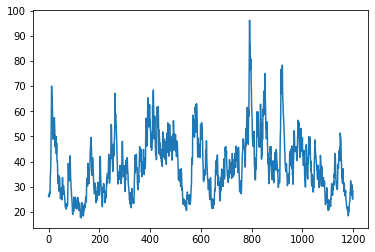

In [424]:
plt.plot(100 * math.sqrt(252) * sim['volatility'])

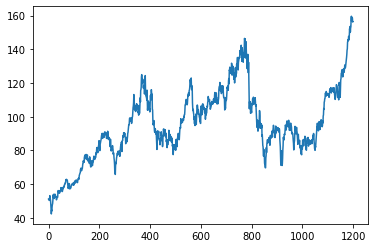

In [425]:
plt.plot(49.823502 * np.exp(np.cumsum(sim['data'])))

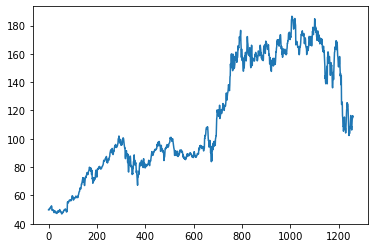

In [426]:
plt.plot(df['Close'])